# Random Forests in Python

In [9]:
# Load Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Load Data

iris = sns.load_dataset('iris')

## Subset X and Y Variables

In [11]:
x = iris.drop('species', axis=1)
y = iris['species']

## Train Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Initial Random Forest Model

In [13]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [14]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 11  2]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# Model is 96% accurate

# Hyperparameter Tuning

In [17]:
# Load Package

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score


## Number of Estimators|

In [18]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.9111111111111111
4 : 0.9555555555555556
5 : 0.9333333333333333
8 : 0.9555555555555556
10 : 0.9777777777777777
20 : 0.9555555555555556
50 : 0.9555555555555556
75 : 0.9555555555555556
100 : 0.9555555555555556
250 : 0.9555555555555556
500 : 0.9555555555555556


### Best accuracy at 10 Trees

## Tuning the remaining 3

In [19]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [20]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

In [22]:
# Fit Model

rf_random.fit(x_train, y_train)


C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClas

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

## Which hyperparameters produced the best accuracy

In [23]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20}

## update parameters

In [24]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=4, max_features="auto", max_depth=30)
forest.fit(x_train, y_train)

C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=4,
                       n_estimators=10)

In [25]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



### Accuracy is 98% weighted

# Feature Importance

In [27]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

sepal_length    0.017953
sepal_width     0.006112
petal_length    0.418837
petal_width     0.557098
dtype: float64

In [28]:
# Sort Values

feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

petal_width     0.557098
petal_length    0.418837
sepal_length    0.017953
sepal_width     0.006112
dtype: float64


<AxesSubplot:>

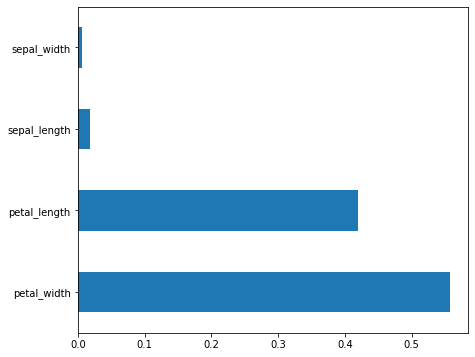

In [30]:
# Visual Importance Values

feature_importances.plot(kind='barh', figsize=(7,6))


## Using API

In [1]:
import quandl

In [2]:
Alaska = quandl.get("FMAC/HPI_AK")
Alaska.head()

,NSA Value,SA Value
Date,,
1975-01-31,34.427647,34.604936
1975-02-28,34.898074,35.035870
1975-03-31,35.384843,35.407964
1975-04-30,35.913989,35.784216
1975-05-31,36.534766,36.228856
